**アルゴリズム**

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.metrics import silhouette_samples
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns

In [2]:
data_wine = load_wine()
X = data_wine.data
y = data_wine.target

     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyan

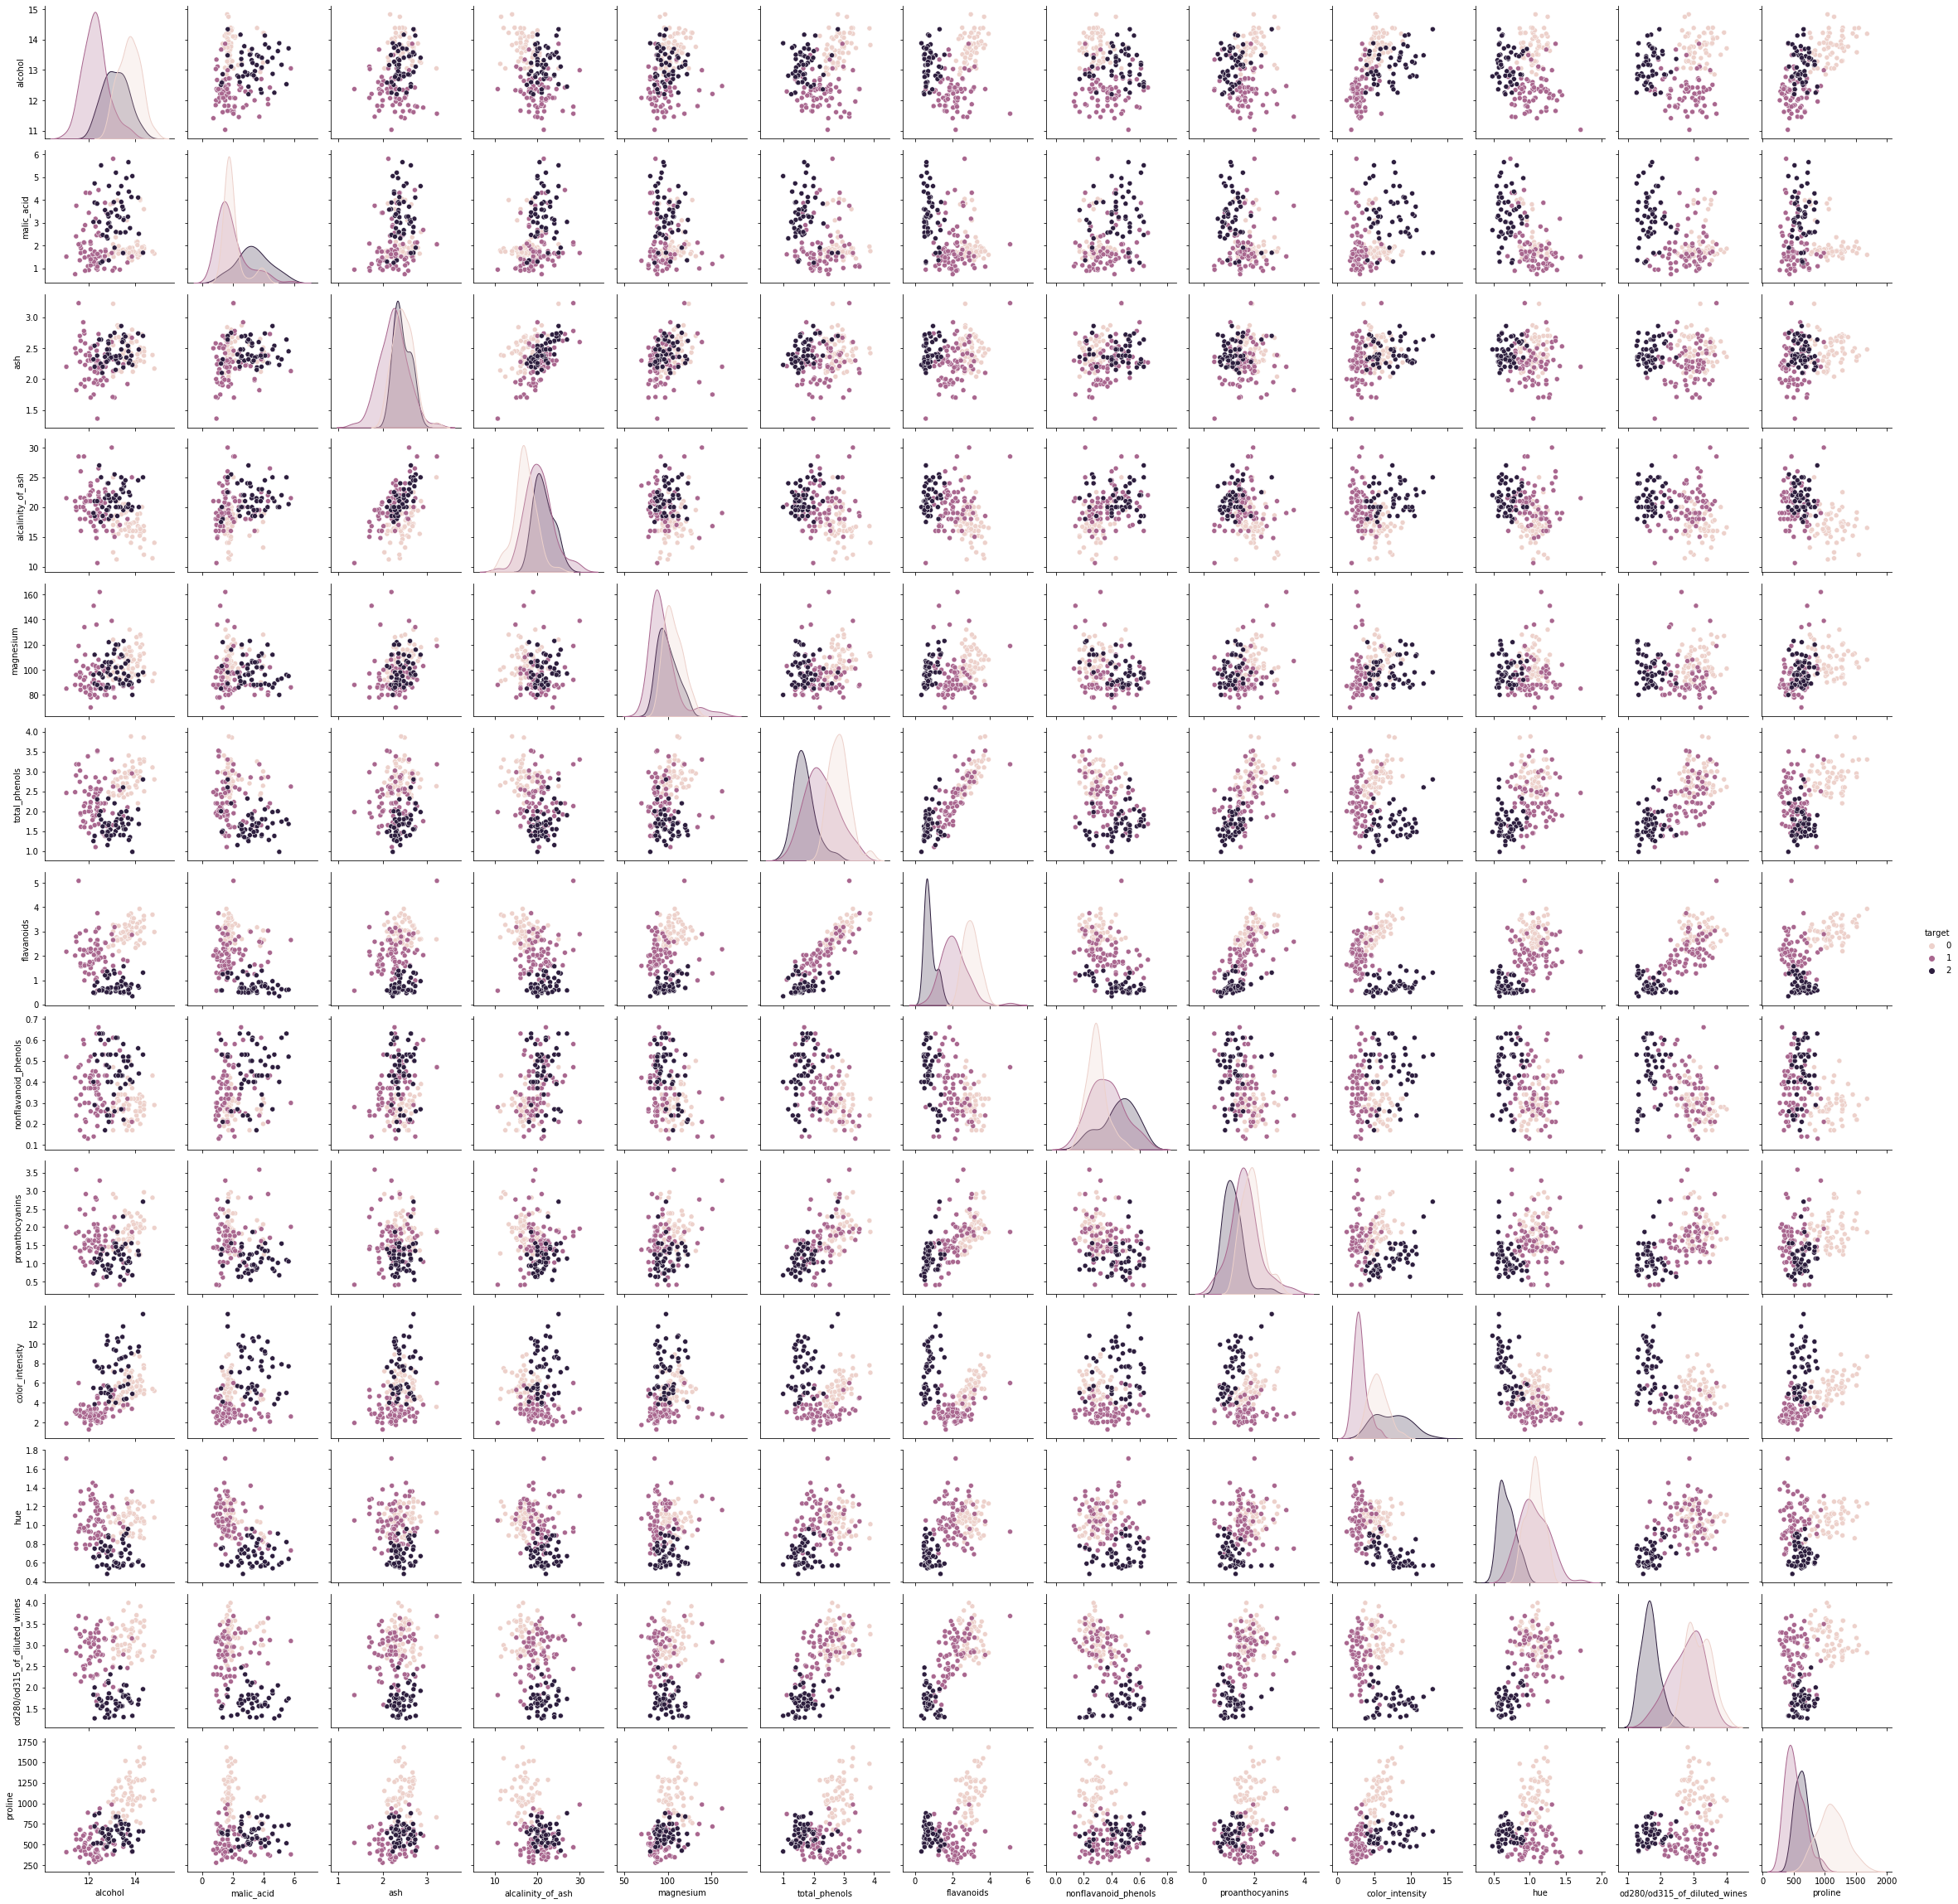

In [16]:
wine_df=pd.DataFrame(X,columns = data_wine.feature_names )
wine_df['target']=y
print(wine_df)
sns.pairplot(wine_df,hue = 'target')

In [3]:
#kmeans
km = KMeans(n_clusters=3)
y_km = km.fit_predict(X)
df = pd.DataFrame({'y_km':y_km})
df['y_wine'] = y

print( pd.crosstab(df['y_km'],df['y_wine']) )

y_wine   0   1   2
y_km              
0        0  50  19
1       46   1   0
2       13  20  29


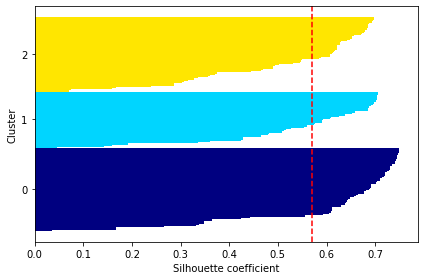

In [17]:
#kmeans シルエット図
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels )
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()

In [5]:
#K近傍法
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
knc = KNeighborsClassifier(n_neighbors=10).fit(X_train, y_train)
y_test_knc = knc.predict(X_test)
df2 = pd.DataFrame({'y_knc':y_test_knc})
df2['y_wine'] = y_test
print( pd.crosstab(df2['y_knc'],df2['y_wine']) )

y_wine   0   1  2
y_knc            
0       14   1  0
1        0  12  6
2        4   4  4


Kmeansを用いたデータのクラスタリングと評価を行った。  
データの特徴マップをみると、閾値で切るタイプの方がきれいに分類できそうな雰囲気もあるが、実際にアルゴリズムにかけるとそれなりに分類できたが、元のデータのクラス２（分類後のクラス２）はあまり良好ではない印象がある。  
そういう意味で言うと、教師がある場合は素直に使った方がいいといえるかもしれない。  
シルエット図を見ると、0は比較的シルエット係数が平均値を超えている。しかし、1,2は半数程度シルエット係数が低く、モデルとしては良好とはいえないかもしれない。  
K近傍法での分類も行った。利用する近傍データの数によって分類のされ方が変わることも確認できた。  
こちらの結果からもわかるように、元のデータのクラス２（分類後のクラス２）は他のクラスと空間的に近いことがわかる。  
実際に教師データがないとしたら、既知の知見から特徴量を絞るといった工夫が必要かもしれない。